#  $ \Huge \ \ -- \ Simulation \ --$


## Import
Lets Start by importing necessary libraries,

In [1]:
#---- Local Imports
try :
    from   utils.PQ_matrices       import P_cov, Q_cov
    from   utils.transfer_function import *
except :
    pass

#---- Library Imports
import numpy as np
from numpy import sin, cos, exp
from scipy.linalg import inv


#---- Plot imports
import matplotlib.pyplot as plt


In [28]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

hide = bool(input())
if hide:
    hide_toggle()


1


In [3]:
hide_toggle(for_next=True)

In [4]:
# In[41]:
def q11(α, T):
    coeff = 0.5/(α**5)
    αT = α * T
    rest = 1 - exp(-2*αT) + 2*αT + αT**3 * 2/3 - αT**2 * 2 - 4*αT*exp(-αT)
    return rest*coeff

def q12(α, T):
    αT = α*T
    coeff = 0.5/(α**4)
    rest = exp(-2*αT) + 1 - 2*exp(-αT) + 2*αT*exp(-αT) - 2*αT + αT**2
    return rest*coeff

def q13(α,T):
    αT = α*T
    coeff = 0.5/(α**3)
    rest = 1 - exp(-2*αT) - 2*αT*exp(-αT)
    return rest*coeff
    
def q22(α,T):
    αT = α*T
    coeff = 0.5/(α**3)
    rest = 4*exp(-αT) - 3 - exp(-2*αT) + 2*αT
    return rest*coeff
    
def q23(α,T):
    αT = α*T
    coeff = 0.5/(α**2)
    rest = exp(-2*αT) + 1 -2*exp(-αT)
    return rest*coeff
    
def q33(α,T):
    αT = α*T
    coeff = 0.5/α
    rest = 1 - exp(-2*αT)
    return rest*coeff


# In[80]:


def Q_cov(σ_m, α=1e8,T=0.5):
    
    expectation_matrix = np.array([
        
        [q11(α,T), q12(α,T), q13(α,T)],
        [q12(α,T), q22(α,T), q23(α,T)],
        [q13(α,T), q23(α,T), q33(α,T)]
    
    ]) 
    
    return 2*α*expectation_matrix*(σ_m**2)
    
    


# In[78]:


def Q_approximated(σ_m, α=0.25,T=0.05):
    
    expectation_matrix = np.array([
        
        [T**5 /20, T**4 /20, T**3 /6],
        [T**4 /8 , T**3 /3 , T**2/2 ],
        [T**3 /6 , T**2 /2 , T]
        
    ])
    
    return 2*α*expectation_matrix*σ_m**2
    



def P22(σ_r,σ_m,α,T ):
    a = 2*(σ_r/T)**2 
    b = (σ_m / (α**2 * T))**2
    c = 2 - (α*T)**2 + (α*T)**3 *2/3 - 2*exp(-α*T) - 2 *α*T*exp(-α*T)
    return a + (b*c)

def P23(σ_r,σ_m,α,T):
    a = σ_m**2 /(T*α**2)
    b= (α*T)**3 *2/3 - 2*exp(-α*T) - 2 *α*T*exp(-α*T)
    return a*b



def P_cov(σ_r,σ_m,α,T):
    expectation_matrix = np.array([
        
        [σ_r**2, σ_r**2/T, 0],
        [σ_r**2/T,P22(σ_r,σ_m,α,T), P23(σ_r,σ_m,α,T)],
        [0,P23(σ_r,σ_m,α,T), σ_m**2]
        
    ])
    return expectation_matrix
#!/usr/bin/env python
# coding: utf-8

# In[16]:

def transfer_function(α,T):
    
    phi = np.array([
        
        [1, T, (1/α**2)*(-1 + exp(-α*T) + α*T)],
        [0,1, (1/α)*(1-exp(-α*T))],
        [0,0, exp(-α*T)]
        
    ])
    return phi

def tranfer_function_approximated(T):
    
    phi = np.array([
        
        [1,T,T**2 /2],
        [0,1, T],
        [0,0,1]
        
    ])


# In[ ]:





hide_toggle()

## Intiate Variables and Compute Matrices
Lets declare our variables and find out the required Matrices. The values are taken directly from research paper.

$\sigma _m ^2 = \frac{A_{max}^2}{3}\times(1+4P_{max} - P_o)$

$\Phi(T, \alpha)=\left[\begin{array}{ccc}
1 & T & \frac{1}{\alpha^{2}}\left[-1+\alpha T+e^{-\alpha T}\right] \\
0 & 1 & \frac{1}{\alpha}\left[1-e^{-\alpha T}\right] \\
0 & 0 & e^{-a T}
\end{array}\right]\quad \quad \quad \quad$


$Q(k)=E\left[u(k) u^{T}(k)\right]=2 \alpha \sigma_{m}^{2}\left[\begin{array}{ccc}
q 11 & q 12 & q 13 \\
q 12 & q 22 & q 23 \\
q 13 & q 23 & 433
\end{array}\right]$

In [5]:
Amax =  4*32
Pmax = 0.1
P_o = 0.5

T = 1
α = 0.1

In [6]:
σ_m = (((Amax**2)/3)*(1+4*Pmax - P_o))**0.5
σ_r = 600

P = P_cov(σ_r,σ_m,α,T)
Q = Q_cov(σ_m, α,T)
R = np.array([[σ_r**2]])

F = transfer_function(α,T)
H = np.array([[1., 0., 0.]])
x = np.array([[0, 0, 0 ]]).T

The objective of the paper was to find out the $\text{Transition matrix} \ \Phi$ and the covariance matrices for the given problem. This snippet executes the Kalman Filter using the respective $P$ and $Q$ covariance matrices from paper.

In [7]:
P = np.array([
    [P[0][0], P[0][1], P[0][2],  0,      0,       0    ],
    [P[1][0], P[1][1], P[1][2],  0,      0,       0    ],
    [P[2][0], P[2][1], P[2][2],  0,      0,       0    ],
    [    0,     0,      0,    P[0][0], P[0][1], P[0][2]],
    [    0,     0,      0,    P[1][0], P[1][1], P[1][2]],
    [    0,     0,      0,    P[2][0], P[2][1], P[2][2]], 
    
    ])



In [8]:
Q = np.array([
    [Q[0][0], Q[0][1], Q[0][2],  0,       0,       0   ],
    [Q[1][0], Q[1][1], Q[1][2],  0,       0,       0   ],
    [Q[2][0], Q[2][1], Q[2][2],  0,       0,       0   ],
    [    0,     0,      0,    Q[0][0], Q[0][1], Q[0][2]],
    [    0,     0,      0,    Q[1][0], Q[1][1], Q[1][2]],
    [    0,     0,      0,    Q[2][0], Q[2][1], Q[2][2]], 
    
    ])


In [9]:
F = np.array([
    [F[0][0], F[0][1], F[0][2],  0,       0,       0   ],
    [F[1][0], F[1][1], F[1][2],  0,       0,       0   ],
    [F[2][0], F[2][1], F[2][2],  0,       0,       0   ],
    [    0,     0,      0,    F[0][0], F[0][1], F[0][2]],
    [    0,     0,      0,    F[1][0], F[1][1], F[1][2]],
    [    0,     0,      0,    F[2][0], F[2][1], F[2][2]], 
    
    ])


In [10]:
H = np.array([
    
    [1,0,0,0,0,0],
    [0,0,0,1,0,0]
])

In [11]:
R = np.array([
    
    [ σ_r**2,    0  ],
    [   0,    σ_r**2]
    
])


## Get Measurements

In [12]:
# consttraj = [0]*500
# θ = np.arange(-3.14/2, 3.14/2, 0.1)
# θ = list(θ) + consttraj# + list(θ)

In [13]:
θ = np.arange(-3.14*10, 3.14*10, 0.1)
r = [10+ i for i in range(len(θ))]

xc = [r[i]*np.cos(j) for (i,j) in enumerate(θ)]
yc = [r[i]*np.sin(j) for (i,j) in enumerate(θ)]

merged = []
for i in range(len(xc)):
    merged.append([[xc[i]],[yc[i]]])
    

## $ \textbf{Apply Kalman  Filter}$


In [14]:
x = np.array([[0, 0, 0, 0, 0, 0]]).T

In [15]:
xs =[]
cov= []

for z in merged:
    
    # predict
    x = F @ x
    P = F @ P @ F.T + Q
    
    #update
    S = H @ P @ H.T + R
    K = P @ H.T @ inv(S)
    y = z - H @ x
    x += K @ y
    P = P - K @ H @ P
    
    xs.append(x)
    cov.append(P)

xs, cov = np.array(xs), np.array(cov)

In [16]:
def plot_all(data1,data2,data3,title1,title2,title3, time=True):
    plt.figure(figsize=(15,5))
    
    plt.subplot(1, 3, 1)
    plt.plot(data1)
    plt.xlabel("time")
    plt.title(title1, fontsize =15)
    
    plt.subplot(1, 3, 2)
    plt.plot(data2)
    plt.title(title2, fontsize =15)
    plt.xlabel("time")
    
    plt.subplot(1, 3, 3)
    plt.plot(data3)
    plt.xlabel("time")
    plt.title(title3, fontsize =15)
    plt.show()
hide_toggle()

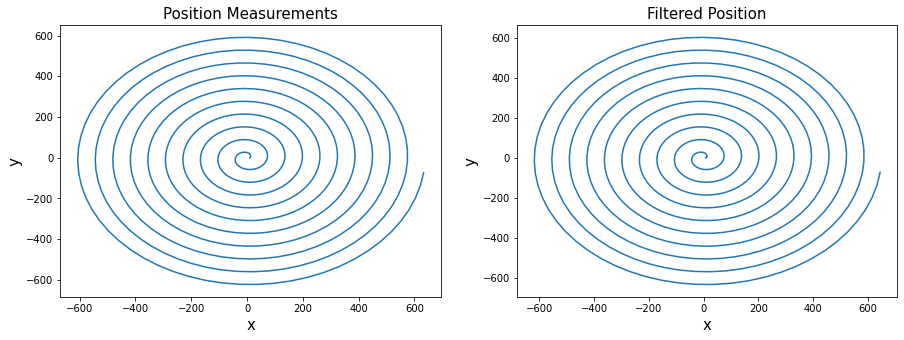

In [17]:
x_fil = []
y_fil = []
for each_state_vec in xs:
    x_fil.append(each_state_vec[0])
    y_fil.append(each_state_vec[3])

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(xc, yc)
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)
plt.title('Position Measurements', fontsize=15)
plt.subplot(1, 2, 2)
plt.plot(x_fil, y_fil)
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)
plt.title('Filtered Position', fontsize=15)
plt.show()

======================================================================================================

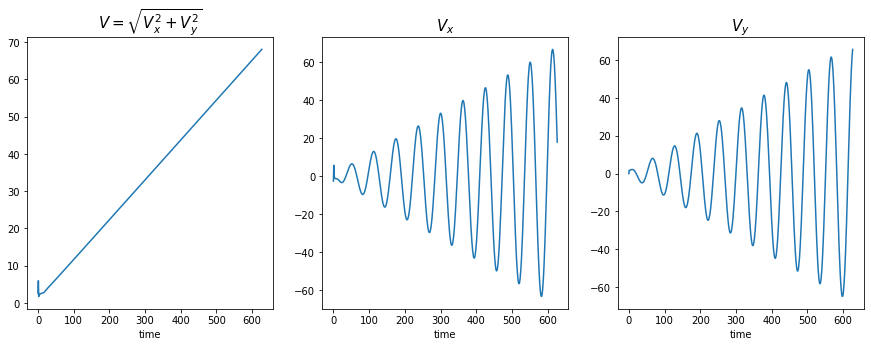

In [18]:
v = []
vx_fil = []
vy_fil = []
for kk in xs:
    vx_fil.append(kk[1])
    vy_fil.append(kk[4])    
    v.append((kk[1]**2 + kk[4]**2)**0.5)
plot_all(v,vx_fil,vy_fil,r"$V = \sqrt{V_x^2 + V_y^2}$",r"$V_x$",r"$V_y$")

----------

$\large \begin{bmatrix}
\dot x = \dot r \cos \theta - r\dot\theta\sin\theta \\
\dot y = \dot r\sin\theta + r\dot\theta \cos\theta 
\end{bmatrix}
\implies$$\large
\begin{bmatrix}
v_x  \\ 
v_y
\end{bmatrix} =
\begin{bmatrix}
cos \theta & -sin \theta \\ 
 sin \theta& cos \theta 
\end{bmatrix}
\begin{bmatrix}
v_r  \\ 
v_\theta 
\end{bmatrix}$

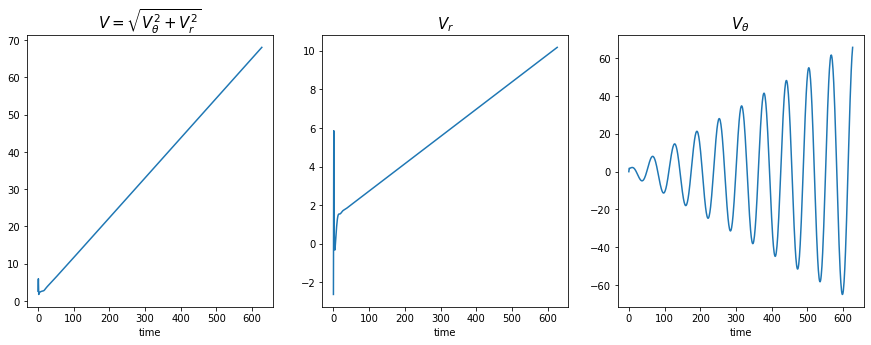

In [19]:
v_pol = []
vθ    = []
vr    = []

for (i,itr) in enumerate(θ):

    trans = np.array([
        [cos(itr), -1*sin(itr)],
        [sin(itr),    cos(itr)]
            ])
    v_vec_cart = np.array([vx_fil[i], vy_fil[i]])
    v_vec = inv(trans)@v_vec_cart
    vr.append(v_vec[0])
    vθ.append(v_vec_cart[1])
    v_pol.append((v_vec_cart[0]**2+v_vec_cart[1]**2)**0.5)

plot_all(v_pol, vr, vθ, r"$V = \sqrt{V_\theta^2 + V_r^2}$" , r"$V_r$", r"$V_\theta$")    

===================================================================================================

$\large \begin{bmatrix}
a_x  \\ 
a_y 
\end{bmatrix}=
\begin{bmatrix}
cos \theta & -sin \theta \\ 
 sin \theta& cos \theta 
\end{bmatrix}
\begin{bmatrix}
a_r  \\ 
a_\theta 
\end{bmatrix}$

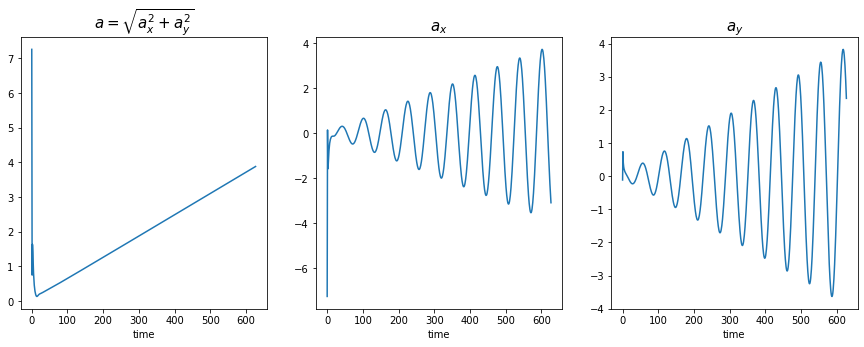

In [20]:
a, ax_fil, ay_fil = [],[],[]
for every_a in xs:
    ax_fil.append(every_a[2])
    ay_fil.append(every_a[5])
    a.append((every_a[2][0]**2 + every_a[5][0]**2)**0.5)

plot_all(a,ax_fil,ay_fil,r"$a = \sqrt{a_x^2 + a_y^2}$",r"$a_x$",r"$a_y$")    

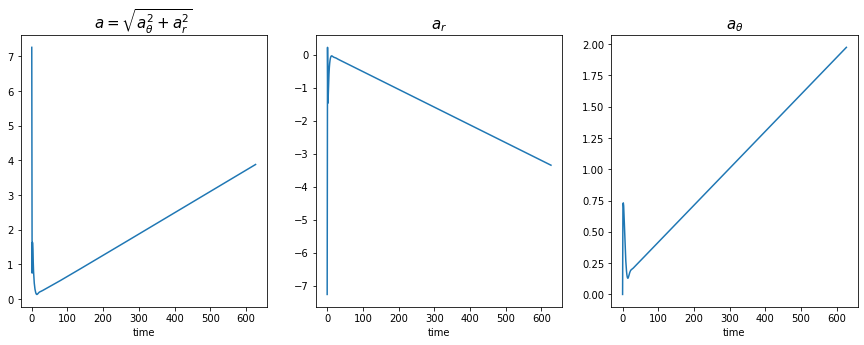

In [21]:
a_pol, aθ, ar = [],[],[]
for (i,itr) in enumerate(θ):

    trans = np.array([
        [cos(itr), -1*sin(itr)],
        [sin(itr),    cos(itr)]
            ])
    a_vec_cart = np.array([ax_fil[i], ay_fil[i]])
    a_vec = inv(trans)@a_vec_cart
    ar.append(a_vec[0])
    aθ.append(a_vec[1])
    a_pol.append((a_vec[0]**2 + a_vec[1]**2)**0.5)
    
plot_all(a_pol,ar,aθ,r"$a = \sqrt{a_\theta^2 + a_r^2}$",r"$a_r$",r"$a_\theta$")    